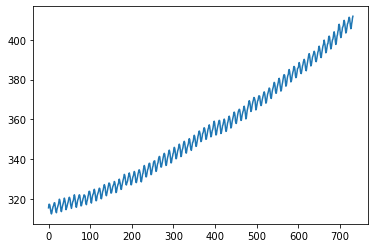

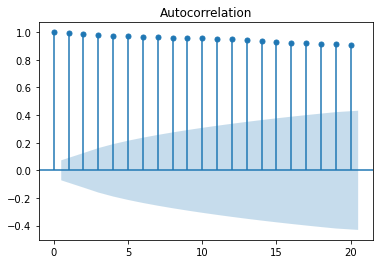

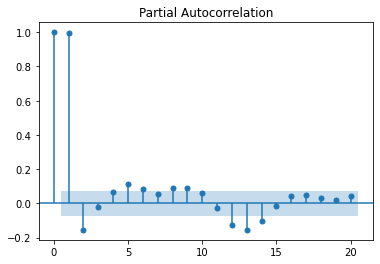

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


data = pd.read_csv('Datos CO2.csv')
y = data['CO2']

num_lags=20

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags)
plt.show()

In [284]:
y.head()

0    315.71
1    317.45
2    317.50
3    317.10
4    315.86
Name: CO2, dtype: float64

In [167]:
import statsmodels as sm
import pmdarima
from pmdarima.arima import ndiffs, nsdiffs

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)

adf_test = sm.tsa.stattools.adfuller(y,maxlag=20) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])


# Tests
s = 12
d = ndiffs(y, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(y, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

ADF test for the original series
Statistic Value: 5.1606191193748625
p-value: 1.0
Regular differences:  1
Seasonal differences: 0


In [168]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test for the original series
Statistic Value: 12.039534898542087
p-value: 1.0


In [172]:
def criteria(y):
    '''
    1.	A stochastic process is covariance stationary (or weak stationary) if
        a.	E(Yt) = µ, for all t
        b.	Var(Yt) = σy2, for all t
        c.	Cov(Yt,Yt-h) = ϒ(h), for all t and h
        TEST: adf_test
    2.	A process is white noise if it is
        a.	Covariance Stationary
        b.	Uncorrelated
        c.	Zero mean
    3.	A process is strict white noise if it is
        a.	Covariance Stationary
        b.	Zero mean
        c.	Independent and identically distributed (iid)
            TEST: LjungBox box_test

    4.	A process is Gaussian white noise if is a WN normally distributed
        Note that under normality, a WN is a SWN because uncorrelated variables are independent when their multivariate distribution is normal
        TEST:Saphiro
    
    '''
    import matplotlib.pyplot as plt
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    plt.plot(y)
    plt.show()
    plot_acf(y,lags=num_lags)
    plt.show()
    plot_pacf(y,lags=num_lags)
    plt.show()
    
    from scipy.stats import kurtosis, skew

    # Basic statistics
    mean = np.mean(y)
    std = np.std(y)
    kurtosis = kurtosis(y)
    skewness = skew(y)
   

    #from pmdarima.arima.utils import ndiffs, nsdiffs
    import statsmodels as sm

    # Ho: the process is not stationary. We need, at least, a unit root
    # H1: the process is stationary. We have to check different models (lags)

    adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
    
    from scipy.stats import shapiro
    # Normality test
    saphiro = shapiro(y)

    import statsmodels.api as sm
    box_test = sm.stats.acorr_ljungbox(y, lags=[20])

    print("\033[1m"+"Step 1: STATIONARY "+'\033[0m')
    print('--'*10)
    print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
    print('\n')
    if adf_test[1]<0.05:
        print("The process is stationary, and NO transformation is needed.")
    else:
        print("The process is not stationary, and it needs transformation.")
        
    print('\n')
    print("\033[1m"+"Step 2: Normal Distribution"+'\033[0m')
    print('--'*10)
    import seaborn as sns
    import scipy.stats as st

    mu = np.mean(y)
    sigma = np.std(y)
    x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)

    plt.show()


    print("Saphiro",saphiro)
    print('\n')
    if saphiro.pvalue>0.05:
        print("It is NORMALLY distributed")
    else:
        print("It is NOT normally distirbuted.")
    
    print('\n')
    print("\033[1m"+"Step 3: White Noise: zero mean, constant variance, acf/pacf is zero"+'\033[0m')
    print('--'*10)
    print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)
    if abs(mean)<0.1:
        print('The mean is nearly zero.')
    
    print('\n')
    print("\033[1m"+"Step 4: Linear Model"+'\033[0m')
    print('--'*10)
    print("LjungBox", box_test)
    print('\n')
    if box_test[1]>0.05:
        print("Data is independently distributed, therefore NO linear model is needed.")
        print('\n')
    else:
        print("Data is not independenlty distrubuted, linear model is needed.")
        print('\n')

def nonlinear(y):
    print("\033[1m"+"Step 5: If WN check Non-Linear Model"+'\033[0m')
    print('--'*10)
    plt.plot(y**2)
    plt.show()
    plot_acf(y**2,lags=num_lags)
    plt.show()
    plot_pacf(y**2,lags=num_lags)
    plt.show()

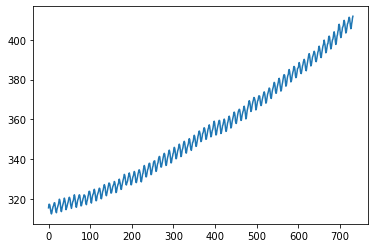

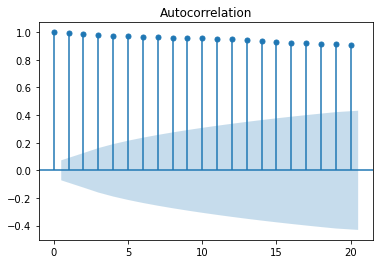

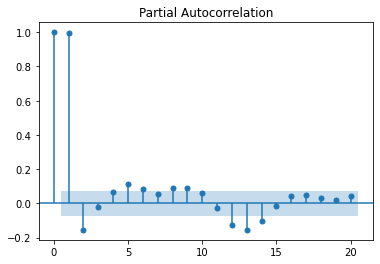

Step 1: STATIONARY:check for Series 2
--------------------
adf_test (12.039534898542087, 1.0, 10, 721, {'1%': -3.4394522667904153, '5%': -2.8655569894909805, '10%': -2.568909106765338}, 675.3286373748488)


The process is not stationary, and it needs transformation.


Step 2: Normal Distribution for Series 2
--------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


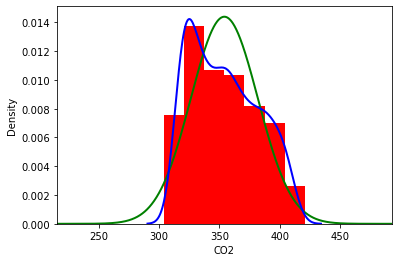

Saphiro ShapiroResult(statistic=0.9427704215049744, pvalue=3.4499538121615366e-16)


It is NOT normally distirbuted.


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero for Series 2
--------------------
Mean 354.01983606557366 Standard deviation 27.710585778376743 Skewness 0.3381921894729217 Kurtosis -1.0693391779895727


Step 4: Linear Model for Series 2
--------------------
LjungBox (array([13457.53168864]), array([0.]))


Data is not independenlty distrubuted, linear model is needed.




In [55]:
criteria(y)

In [54]:
z = y.diff().dropna()

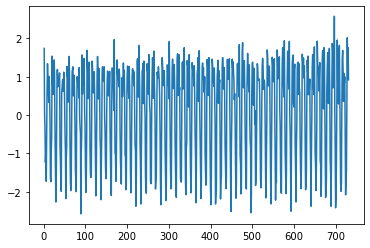

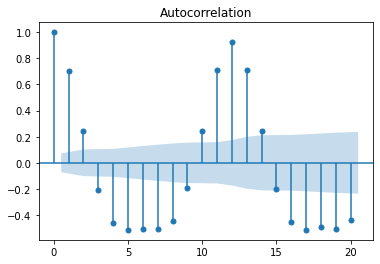

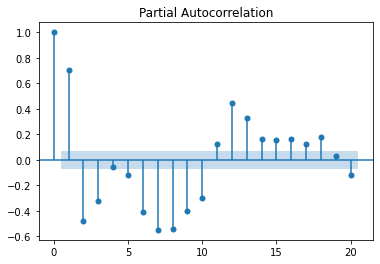

Step 1: STATIONARY:check for Series 3
--------------------
adf_test (-15.738116094526454, 1.265496015501439e-28, 10, 720, {'1%': -3.439464954327953, '5%': -2.8655625802683473, '10%': -2.5689120852623457}, 787.6787015267987)


The process is stationary, and NO transformation is needed.


Step 2: Normal Distribution for Series 3
--------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


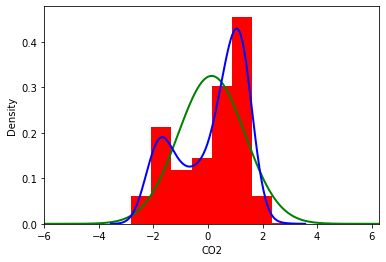

Saphiro ShapiroResult(statistic=0.9077592492103577, pvalue=1.285694742468127e-20)


It is NOT normally distirbuted.


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero for Series 3
--------------------
Mean 0.13138166894664846 Standard deviation 1.2282029538784227 Skewness -0.5823476010514048 Kurtosis -0.9917949545897766


Step 4: Linear Model for Series 3
--------------------
LjungBox (array([3725.02113968]), array([0.]))


Data is not independenlty distrubuted, linear model is needed.




In [56]:
criteria(z)

Step 5: If WN check Non-Linear Model for Series 3
--------------------


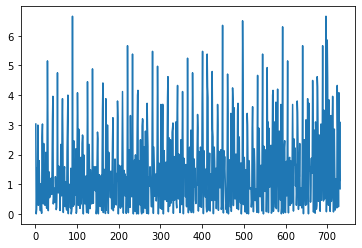

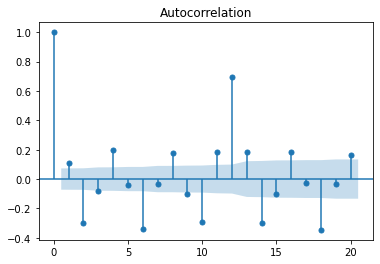

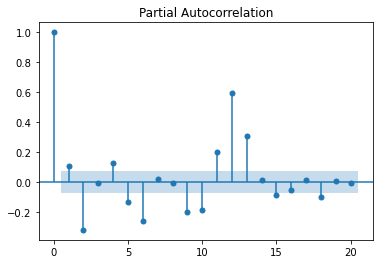

In [57]:
nonlinear(z)

In [169]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(z,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test for the original series
Statistic Value: -15.738116094526454
p-value: 1.265496015501439e-28


                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  732
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.189
Date:                            Fri, 26 Nov 2021   AIC                            428.377
Time:                                    20:29:09   BIC                            451.350
Sample:                                         0   HQIC                           437.240
                                            - 732                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2105      0.036      5.793      0.000       0.139       0.282
ma.L1         -0.5582      0.039   

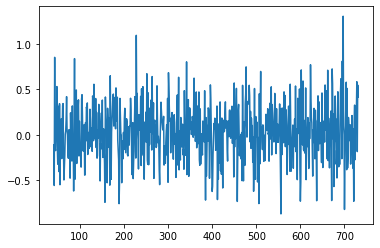

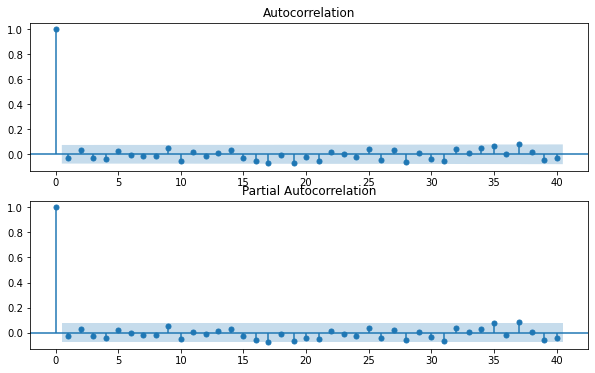

In [205]:
s = 12

fit = SARIMAX(endog = y, order = (1,1,1), seasonal_order = (1,0,1,s)).fit()
print(fit.summary())
residuals = fit.resid[41:]

nlags=40


# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.


plt.plot(residuals)
plt.show()
fig, ax = plt.subplots(2,1, figsize = (10,6))
plot_acf(residuals, lags = nlags, ax=ax[0])
plot_pacf(residuals, lags = nlags, method="ols", ax=ax[1])
plt.show()

In [200]:
d = ndiffs(residuals, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(residuals, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

Regular differences:  0
Seasonal differences: 0


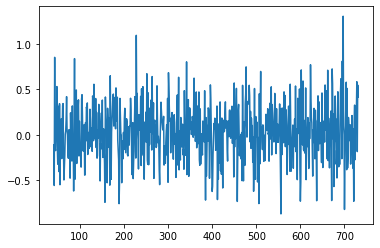

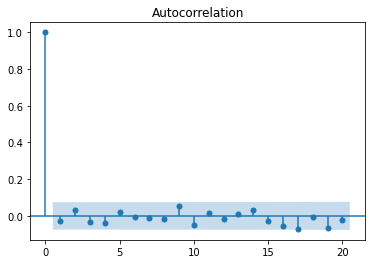

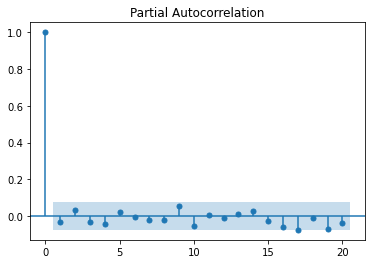

Step 1: STATIONARY 
--------------------
adf_test (-26.99034880195821, 0.0, 0, 690, {'1%': -3.4398627454742488, '5%': -2.8657378555534248, '10%': -2.569005465238395}, 330.02264892851167)


The process is stationary, and NO transformation is needed.


Step 2: Normal Distribution
--------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


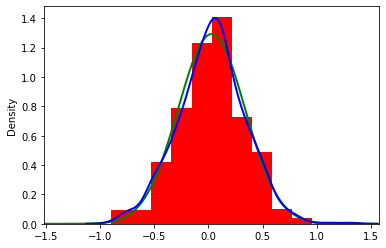

Saphiro ShapiroResult(statistic=0.9959223866462708, pvalue=0.06892590969800949)


It is NORMALLY distributed


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero
--------------------
Mean 0.02901069732336451 Standard deviation 0.30880228577816277 Skewness 0.024878059145558004 Kurtosis 0.3885704759796904
The mean is nearly zero.


Step 4: Linear Model
--------------------
LjungBox (array([19.09359593]), array([0.51574987]))


Data is independently distributed, therefore NO linear model is needed.




In [206]:
criteria(residuals)

                                      SARIMAX Results                                       
Dep. Variable:                                  CO2   No. Observations:                  732
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -208.874
Date:                              Fri, 26 Nov 2021   AIC                            431.748
Time:                                      20:46:50   BIC                            463.909
Sample:                                           0   HQIC                           444.155
                                              - 732                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7704      0.098     -7.864      0.000      -0.962      -0.578
ar.L2          0.18

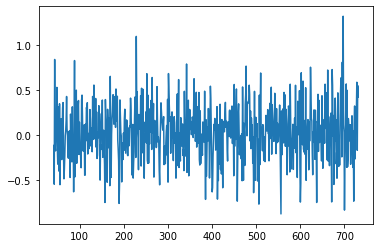

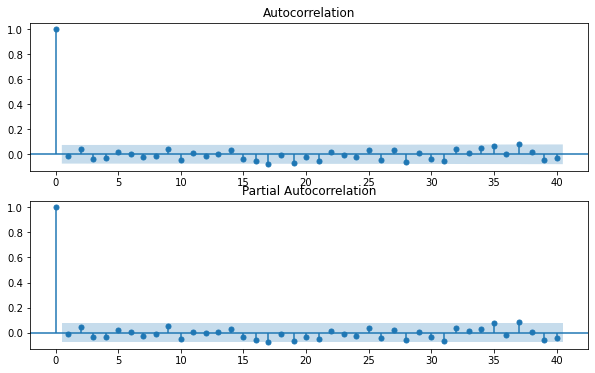

In [210]:
s = 12

fit = SARIMAX(endog = y, order = (2,1,2), seasonal_order = (1,0,1,s)).fit()
print(fit.summary())
residuals_2 = fit.resid[41:]

nlags=40


# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.


plt.plot(residuals_2)
plt.show()
fig, ax = plt.subplots(2,1, figsize = (10,6))
plot_acf(residuals_2, lags = nlags, ax=ax[0])
plot_pacf(residuals_2, lags = nlags, method="ols", ax=ax[1])
plt.show()

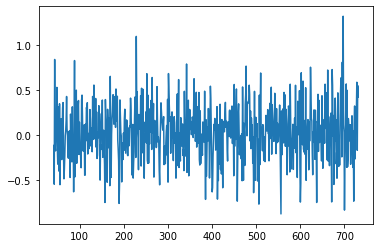

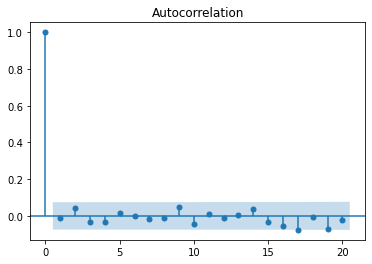

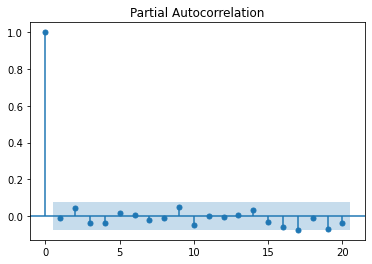

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Step 1: STATIONARY 
--------------------
adf_test (-26.514297328185847, 0.0, 0, 690, {'1%': -3.4398627454742488, '5%': -2.8657378555534248, '10%': -2.569005465238395}, 328.72051790645264)


The process is stationary, and NO transformation is needed.


Step 2: Normal Distribution
--------------------


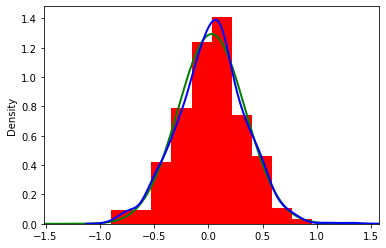

Saphiro ShapiroResult(statistic=0.9959092140197754, pvalue=0.0678914487361908)


It is NORMALLY distributed


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero
--------------------
Mean 0.02965096778019756 Standard deviation 0.30832963447309564 Skewness 0.013952748254728886 Kurtosis 0.3976612681490703
The mean is nearly zero.


Step 4: Linear Model
--------------------
LjungBox (array([18.57439697]), array([0.54962504]))


Data is independently distributed, therefore NO linear model is needed.




In [211]:
criteria(residuals_2)

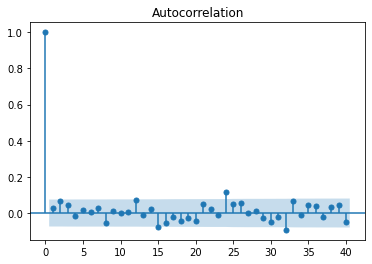

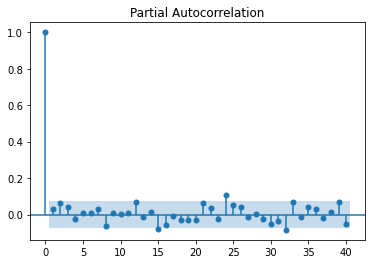

Ljung-Box for squared residuals
Statistic value [57.67013547] p_value [0.03479711]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [178]:
# Study the squared residuals for SWN

plot_acf(residuals**2,lags=nlags)
plt.show()
plot_pacf(residuals**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuals**2, lags=[40])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

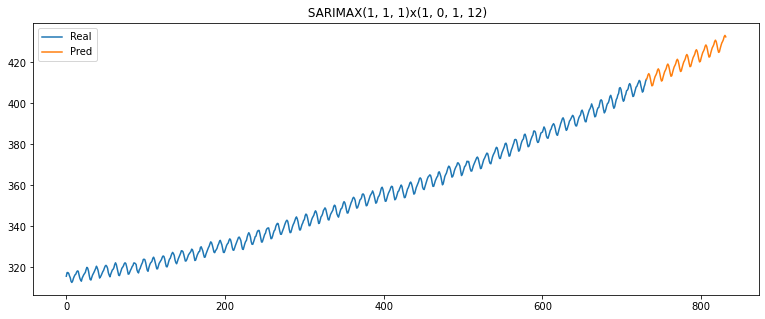

In [212]:
# Pintamos las siguientes 100 predicciones
y_pred = fit.forecast(steps = 100)

# Ponemos el último índice real
y_pred.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# print(y_pred)

plt.figure(figsize = (13,5))
plt.plot(y, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.title(" SARIMAX(1, 1, 1)x(1, 0, 1, 12)")
plt.legend()
plt.show()

In [183]:
y_pred

732    412.496501
733    413.918360
734    414.567139
735    413.829057
736    412.085340
Name: predicted_mean, dtype: float64

In [184]:
std = np.std(residuals)

quantile_2_5=np.quantile(residuals, 0.025)
quantile_97_5=np.quantile(residuals, 0.975)

print("95% confidence intervals using quantiles")
print("Lower limit 2.5%:",quantile_2_5,"Upper limit 97.5%:",quantile_97_5)

print("95% confidence intervals assuming normality")
print("Normal Percentile 2.5%:",-1.96*std,"Normal Percentile 97.5%:",1.96*std)

95% confidence intervals using quantiles
Lower limit 2.5%: -0.5679334368064133 Upper limit 97.5%: 0.6218635057421409
95% confidence intervals assuming normality
Normal Percentile 2.5%: -0.605252480125199 Normal Percentile 97.5%: 0.605252480125199


In [194]:
fit = SARIMAX(endog = y, order = (2,1,2), seasonal_order = (1,0,1,s)).fit()
print(fit.summary())
y_pred = fit.forecast(steps = 24)

# Ponemos el último índice real
y_pred.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

                                      SARIMAX Results                                       
Dep. Variable:                                  CO2   No. Observations:                  732
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -208.874
Date:                              Fri, 26 Nov 2021   AIC                            431.748
Time:                                      19:20:37   BIC                            463.909
Sample:                                           0   HQIC                           444.155
                                              - 732                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7704      0.098     -7.864      0.000      -0.962      -0.578
ar.L2          0.18

In [195]:
fit_1 = SARIMAX(endog = y, order = (1,1,1), seasonal_order = (1,0,1,s)).fit()
print(fit_1.summary())
y_pred_1 = fit_1.forecast(steps = 24)

# Ponemos el último índice real
y_pred_1.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred_1 = y_pred_1.reset_index().sort_values(by = 'index').set_index('index')

                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  732
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.189
Date:                            Fri, 26 Nov 2021   AIC                            428.377
Time:                                    19:20:39   BIC                            451.350
Sample:                                         0   HQIC                           437.240
                                            - 732                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2105      0.036      5.793      0.000       0.139       0.282
ma.L1         -0.5582      0.039   

In [196]:
import statistics
statistics.variance (y_pred_1.predicted_mean)

5.288053521219361

In [197]:
statistics.variance(y_pred.predicted_mean)

5.2948440062680735

In [213]:
y_pred.head(10)

,predicted_mean
index,
731,411.750000
732,412.480752
733,413.908047
734,414.556242
735,413.820130
736,412.072267
737,410.024952
738,408.568414
739,408.872521


# OUT-OF-SAMPLE MODEL FOR THE LAST 120 REAL VALUES

In [272]:
sample = data['CO2'].iloc[-121:]

In [247]:
split_point = len(data['CO2']) - 120

In [269]:
split_point

612

In [252]:
y_sample = data['CO2'].iloc[0:split_point]

In [253]:
y_sample

0      315.71
1      317.45
2      317.50
3      317.10
4      315.86
        ...  
607    382.99
608    384.19
609    385.56
610    386.94
611    387.48
Name: CO2, Length: 612, dtype: float64

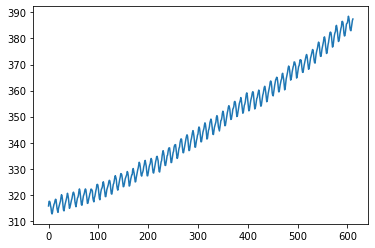

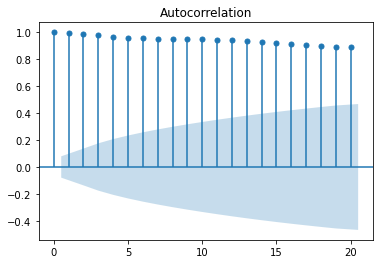

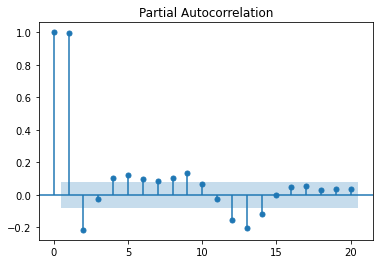

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Step 1: STATIONARY 
--------------------
adf_test (8.616120131456181, 1.0, 10, 601, {'1%': -3.441277537487585, '5%': -2.8663610578661083, '10%': -2.5693375106104357}, 550.9253609388475)


The process is not stationary, and it needs transformation.


Step 2: Normal Distribution
--------------------


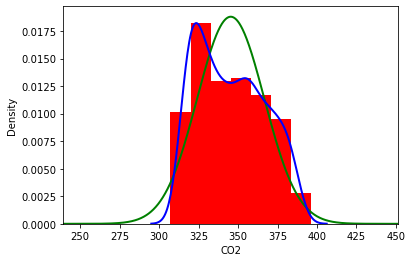

Saphiro ShapiroResult(statistic=0.9439193606376648, pvalue=1.9069379796478152e-14)


It is NOT normally distirbuted.


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero
--------------------
Mean 345.35382352941184 Standard deviation 21.219658971903637 Skewness 0.2822833703785838 Kurtosis -1.13304868989267


Step 4: Linear Model
--------------------
LjungBox (array([11040.18452869]), array([0.]))


Data is not independenlty distrubuted, linear model is needed.




In [255]:
criteria(y_sample)

In [256]:
z_sample = y_sample.diff().dropna()

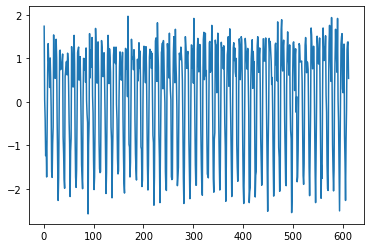

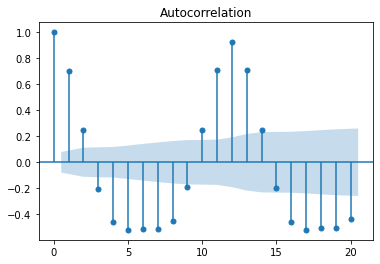

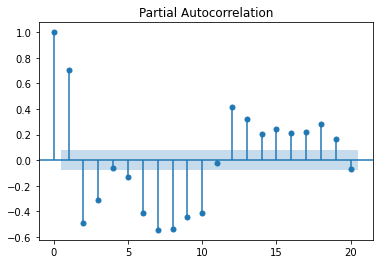

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Step 1: STATIONARY 
--------------------
adf_test (-15.772371959936914, 1.1568955267191388e-28, 10, 600, {'1%': -3.4412958288564814, '5%': -2.8663691131481484, '10%': -2.5693418027777777}, 614.0610980546542)


The process is stationary, and NO transformation is needed.


Step 2: Normal Distribution
--------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


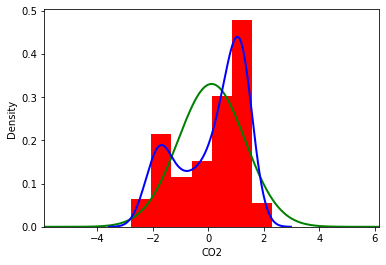

Saphiro ShapiroResult(statistic=0.9017925262451172, pvalue=2.2906396675213254e-19)


It is NOT normally distirbuted.


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero
--------------------
Mean 0.11746317512274966 Standard deviation 1.207022121789854 Skewness -0.6108731604139676 Kurtosis -0.9778944186405134


Step 4: Linear Model
--------------------
LjungBox (array([3158.51995452]), array([0.]))


Data is not independenlty distrubuted, linear model is needed.




In [257]:
criteria(z_sample)

## MODEL SARIMA (1,1,1)X(1,0,1,12)

                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  612
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -159.784
Date:                            Sun, 28 Nov 2021   AIC                            329.568
Time:                                    15:19:48   BIC                            351.643
Sample:                                         0   HQIC                           338.154
                                            - 612                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2067      0.042      4.899      0.000       0.124       0.289
ma.L1         -0.5486      0.053   

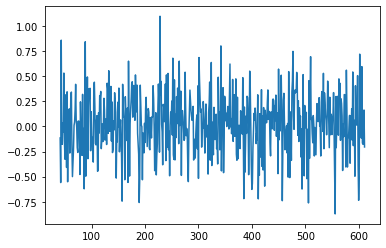

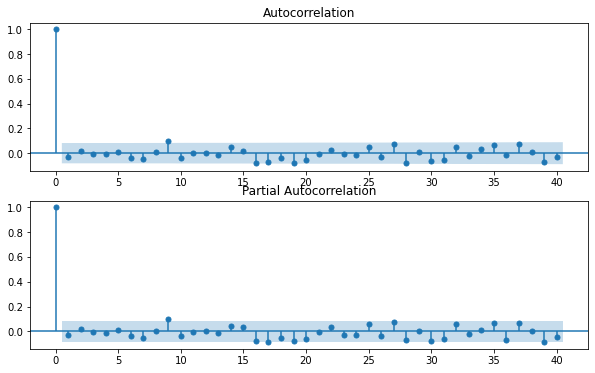

In [259]:
s = 12

fit = SARIMAX(endog = y_sample, order = (1,1,1), seasonal_order = (1,0,1,s)).fit()
print(fit.summary())
residuals_2 = fit.resid[41:]

nlags=40


# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.


plt.plot(residuals_2)
plt.show()
fig, ax = plt.subplots(2,1, figsize = (10,6))
plot_acf(residuals_2, lags = nlags, ax=ax[0])
plot_pacf(residuals_2, lags = nlags, method="ols", ax=ax[1])
plt.show()

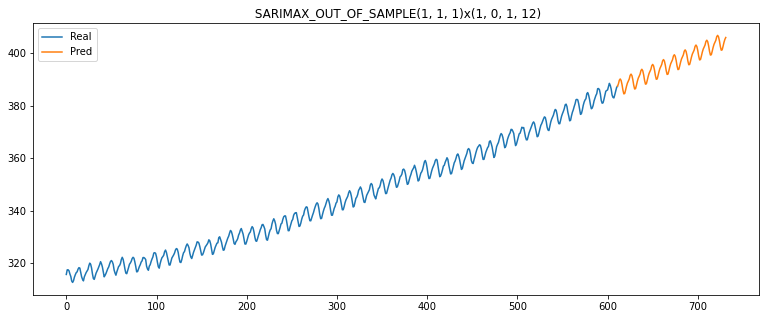

In [295]:
# Pintamos las siguientes 120 predicciones
y_pred = fit.forecast(steps = 120)

# Ponemos el último índice real
y_pred.loc[len(y_sample)-1] = y_sample[len(y_sample)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# print(y_pred)

plt.figure(figsize = (13,5))
plt.plot(y_sample, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.title(" SARIMAX_OUT_OF_SAMPLE(1, 1, 1)x(1, 0, 1, 12)")
plt.legend()
plt.show()

In [296]:
std = np.std(residuals_2)

quantile_2_5=np.quantile(residuals_2, 0.025)
quantile_97_5=np.quantile(residuals_2, 0.975)

print("95% confidence intervals using quantiles")
print("Lower limit 2.5%:",quantile_2_5,"Upper limit 97.5%:",quantile_97_5)

print("95% confidence intervals assuming normality")
print("Normal Percentile 2.5%:",-1.96*std,"Normal Percentile 97.5%:",1.96*std)

95% confidence intervals using quantiles
Lower limit 2.5%: -0.555774105059399 Upper limit 97.5%: 0.567090315238616
95% confidence intervals assuming normality
Normal Percentile 2.5%: -0.5853978453636742 Normal Percentile 97.5%: 0.5853978453636742


In [297]:
fit_sample = SARIMAX(endog = y_sample, order = (1,1,1), seasonal_order = (1,0,1,s)).fit()
print(fit_1.summary())

# Ponemos el último índice real
y_pred.loc[len(y_sample)-1] = y_sample[len(y_sample)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  732
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.189
Date:                            Sun, 28 Nov 2021   AIC                            428.377
Time:                                    16:02:37   BIC                            451.350
Sample:                                         0   HQIC                           437.240
                                            - 732                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2105      0.036      5.793      0.000       0.139       0.282
ma.L1         -0.5582      0.039   

In [298]:
statistics.variance(y_pred.predicted_mean)

32.372918914979834

In [299]:
y_pred

,predicted_mean
index,
611,387.480000
612,388.308957
613,389.709172
614,390.216407
615,389.645651
...,...
727,401.293893
728,402.631538
729,404.092869


In [304]:
prediction = y_pred["predicted_mean"].iloc[:]
prediction

index
611    387.480000
612    388.308957
613    389.709172
614    390.216407
615    389.645651
          ...    
727    401.293893
728    402.631538
729    404.092869
730    405.263997
731    406.015203
Name: predicted_mean, Length: 121, dtype: float64

In [273]:
sample

611    387.48
612    388.82
613    389.55
614    390.14
615    389.48
        ...  
727    406.00
728    408.02
729    409.07
730    410.83
731    411.75
Name: CO2, Length: 121, dtype: float64

In [305]:
np.array(sample)

array([387.48, 388.82, 389.55, 390.14, 389.48, 388.03, 386.11, 384.74,
       384.43, 386.02, 387.42, 388.71, 390.2 , 391.17, 392.46, 393.  ,
       392.15, 390.2 , 388.35, 386.85, 387.24, 388.67, 389.79, 391.33,
       391.86, 392.6 , 393.25, 394.19, 393.74, 392.51, 390.13, 389.08,
       389.  , 390.28, 391.86, 393.12, 393.86, 394.4 , 396.18, 396.74,
       395.71, 394.36, 392.39, 391.11, 391.05, 392.98, 394.34, 395.55,
       396.8 , 397.43, 398.41, 399.78, 398.61, 397.32, 395.2 , 393.45,
       393.7 , 395.16, 396.84, 397.85, 398.01, 399.77, 401.38, 401.78,
       401.25, 399.1 , 397.03, 395.38, 396.03, 397.28, 398.91, 399.98,
       400.28, 401.54, 403.28, 403.96, 402.8 , 401.31, 398.93, 397.63,
       398.29, 400.16, 401.85, 402.56, 404.12, 404.87, 407.45, 407.72,
       406.83, 404.41, 402.27, 401.05, 401.59, 403.55, 404.45, 406.17,
       406.46, 407.22, 409.04, 409.69, 408.88, 407.12, 405.13, 403.37,
       403.63, 405.12, 406.81, 407.96, 408.32, 409.41, 410.24, 411.24,
      

In [306]:
error = np.array(sample) - np.array(prediction)

In [308]:
MSFE[Periods_ahead] = np.mean(error**2)
MAPE[Periods_ahead] = np.mean(np.abs(error/np.array(sample))) * 100

In [309]:
print("MSFE",MSFE)
print("MAPE %",MAPE)

MSFE [[7.39329594]
 [0.        ]]
MAPE % [[0.53962166]
 [0.        ]]


## MODEL SARIMA (2,1,2)X(1,0,1,12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                  CO2   No. Observations:                  612
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -158.752
Date:                              Sun, 28 Nov 2021   AIC                            331.504
Time:                                      16:46:00   BIC                            362.410
Sample:                                           0   HQIC                           343.525
                                              - 612                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7348      0.103     -7.143      0.000      -0.936      -0.533
ar.L2          0.22

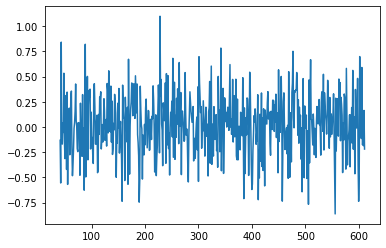

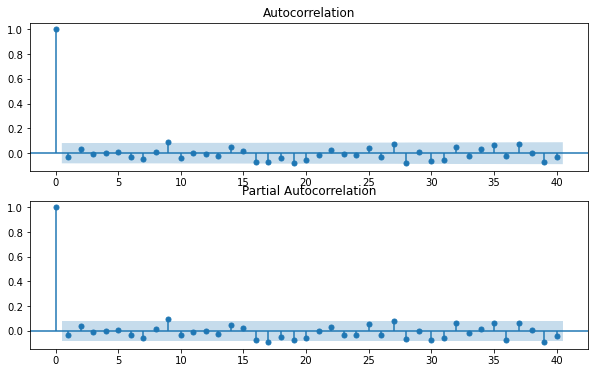

In [310]:
s = 12

fit = SARIMAX(endog = y_sample, order = (2,1,2), seasonal_order = (1,0,1,s)).fit()
print(fit.summary())
residuals_2 = fit.resid[41:]

nlags=40


# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.


plt.plot(residuals_2)
plt.show()
fig, ax = plt.subplots(2,1, figsize = (10,6))
plot_acf(residuals_2, lags = nlags, ax=ax[0])
plot_pacf(residuals_2, lags = nlags, method="ols", ax=ax[1])
plt.show()

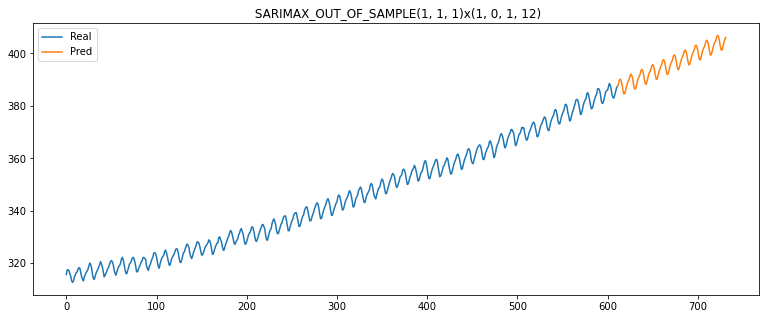

In [311]:
# Pintamos las siguientes 120 predicciones
y_pred = fit.forecast(steps = 120)

# Ponemos el último índice real
y_pred.loc[len(y_sample)-1] = y_sample[len(y_sample)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# print(y_pred)

plt.figure(figsize = (13,5))
plt.plot(y_sample, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.title(" SARIMAX_OUT_OF_SAMPLE(1, 1, 1)x(1, 0, 1, 12)")
plt.legend()
plt.show()

In [312]:
std = np.std(residuals_2)

quantile_2_5=np.quantile(residuals_2, 0.025)
quantile_97_5=np.quantile(residuals_2, 0.975)

print("95% confidence intervals using quantiles")
print("Lower limit 2.5%:",quantile_2_5,"Upper limit 97.5%:",quantile_97_5)

print("95% confidence intervals assuming normality")
print("Normal Percentile 2.5%:",-1.96*std,"Normal Percentile 97.5%:",1.96*std)

95% confidence intervals using quantiles
Lower limit 2.5%: -0.5626741491972922 Upper limit 97.5%: 0.5782954252759964
95% confidence intervals assuming normality
Normal Percentile 2.5%: -0.5849438788535363 Normal Percentile 97.5%: 0.5849438788535363


In [322]:
fit_sample = SARIMAX(endog = y_sample, order = (2,1,2), seasonal_order = (1,0,1,s)).fit()
print(fit_1.summary())

# Ponemos el último índice real
y_pred.loc[len(y_sample)-1] = y_sample[len(y_sample)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  732
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.189
Date:                            Sun, 28 Nov 2021   AIC                            428.377
Time:                                    16:53:59   BIC                            451.350
Sample:                                         0   HQIC                           437.240
                                            - 732                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2105      0.036      5.793      0.000       0.139       0.282
ma.L1         -0.5582      0.039   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [323]:
statistics.variance(y_pred.predicted_mean)

32.59036183234487

In [324]:
y_pred

,predicted_mean
index,
611,387.480000
612,388.285954
613,389.713491
614,390.207465
615,389.650609
...,...
727,401.375121
728,402.702305
729,404.169518


In [325]:
prediction = y_pred["predicted_mean"].iloc[:]
prediction

index
611    387.480000
612    388.285954
613    389.713491
614    390.207465
615    389.650609
          ...    
727    401.375121
728    402.702305
729    404.169518
730    405.339110
731    406.090204
Name: predicted_mean, Length: 121, dtype: float64

In [326]:
sample

611    387.48
612    388.82
613    389.55
614    390.14
615    389.48
        ...  
727    406.00
728    408.02
729    409.07
730    410.83
731    411.75
Name: CO2, Length: 121, dtype: float64

In [327]:
np.array(sample)

array([387.48, 388.82, 389.55, 390.14, 389.48, 388.03, 386.11, 384.74,
       384.43, 386.02, 387.42, 388.71, 390.2 , 391.17, 392.46, 393.  ,
       392.15, 390.2 , 388.35, 386.85, 387.24, 388.67, 389.79, 391.33,
       391.86, 392.6 , 393.25, 394.19, 393.74, 392.51, 390.13, 389.08,
       389.  , 390.28, 391.86, 393.12, 393.86, 394.4 , 396.18, 396.74,
       395.71, 394.36, 392.39, 391.11, 391.05, 392.98, 394.34, 395.55,
       396.8 , 397.43, 398.41, 399.78, 398.61, 397.32, 395.2 , 393.45,
       393.7 , 395.16, 396.84, 397.85, 398.01, 399.77, 401.38, 401.78,
       401.25, 399.1 , 397.03, 395.38, 396.03, 397.28, 398.91, 399.98,
       400.28, 401.54, 403.28, 403.96, 402.8 , 401.31, 398.93, 397.63,
       398.29, 400.16, 401.85, 402.56, 404.12, 404.87, 407.45, 407.72,
       406.83, 404.41, 402.27, 401.05, 401.59, 403.55, 404.45, 406.17,
       406.46, 407.22, 409.04, 409.69, 408.88, 407.12, 405.13, 403.37,
       403.63, 405.12, 406.81, 407.96, 408.32, 409.41, 410.24, 411.24,
      

In [328]:
error = np.array(sample) - np.array(prediction)

In [329]:
MSFE[Periods_ahead] = np.mean(error**2)
MAPE[Periods_ahead] = np.mean(np.abs(error/np.array(sample))) * 100

In [330]:
print("MSFE",MSFE)
print("MAPE %",MAPE)

MSFE [[7.16838933]
 [0.        ]]
MAPE % [[0.53060696]
 [0.        ]]
